In [1]:
import torch
import numpy as np
import math
from utils.dsp import load_wav
from utils.dsp import melspectrogram, unnormalize, db_to_amp
import time
import IPython.display
import librosa
import librosa.display

In [2]:
def print_datas(data):
    print('shape:', data.shape)
    print('min:', data.min() )
    print('max:', data.max() )
    print('mean:', data.mean() )

In [3]:
dim_neck = 32
dim_emb = 256
dim_pre = 512
freq = 32

In [4]:
device = torch.device('cpu')

In [5]:
s = 5000
wav = load_wav('./VCTK-Corpus/wav48/p225/p225_001.wav')[s:16000+s]
print_datas(wav)

shape: (16000,)
min: -0.70037174
max: 0.78906715
mean: -0.00012405896


In [6]:
IPython.display.Audio(wav, rate=16000)

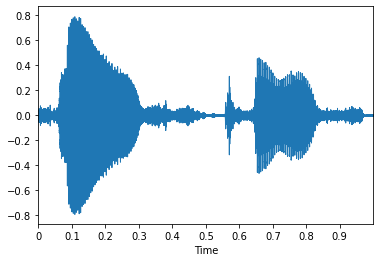

In [7]:
librosa.display.waveplot(wav, 16000)

In [8]:
mel = melspectrogram(wav)
pad_len = math.ceil(mel.shape[1] / 32) * 32 - mel.shape[1]
mel = np.pad(mel, ((0,0), (0, pad_len)), mode='constant')
print_datas(mel)

shape: (1025, 64)
min: 0.0
max: 1.0
mean: 0.39186054


/Users/suzukidaishi/.pyenv/versions/3.7.9/lib/python3.7/site-packages/librosa/filters.py:235: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  warnings.warn('Empty filters detected in mel frequency basis. '


/Users/suzukidaishi/.pyenv/versions/3.7.9/lib/python3.7/site-packages/librosa/display.py:862: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/Users/suzukidaishi/.pyenv/versions/3.7.9/lib/python3.7/site-packages/librosa/display.py:862: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/Users/suzukidaishi/.pyenv/versions/3.7.9/lib/python3.7/site-packages/librosa/display.py:862: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


<AxesSubplot:xlabel='Time', ylabel='Hz'>

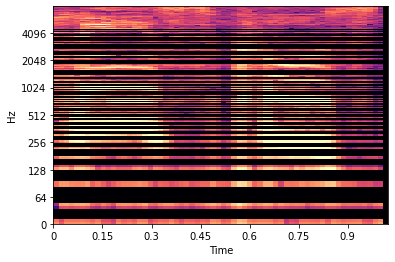

In [9]:
librosa.display.specshow(mel, sr=16000, hop_length=256, x_axis='time', y_axis='log')

In [10]:
mel_rec = mel
mel_rec = mel_rec[:,:-pad_len]
c = unnormalize(mel_rec)
c = db_to_amp(c)
print_datas(c)

shape: (1025, 63)
min: 1e-05
max: 1.0
mean: 0.028663244


<AxesSubplot:xlabel='Time', ylabel='Hz'>

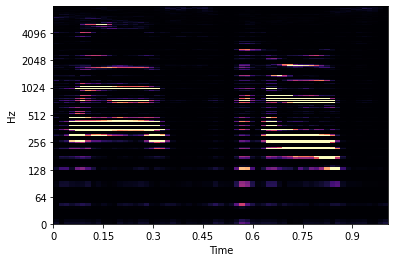

In [11]:
librosa.display.specshow(c, sr=16000, hop_length=256, x_axis='time', y_axis='log')

In [12]:
waveform = librosa.feature.inverse.mel_to_audio(c, sr=16000, n_fft=1024, hop_length=256, win_length=1024, fmin=90, fmax=7600)
print_datas(waveform)

shape: (15872,)
min: -0.12599438
max: 0.14787975
mean: 3.9064474e-07


In [13]:
IPython.display.Audio(waveform, rate=16000)

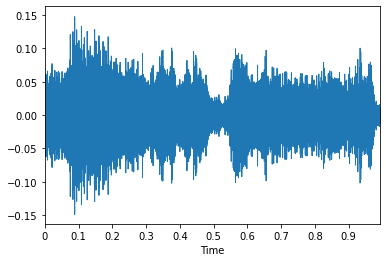

In [14]:
librosa.display.waveplot(waveform, 16000)